In [47]:
from statsbombpy import sb

import os

import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings("ignore")

email = "nathan.talbot@etu.uca.fr"
password = os.environ["mdp_statsbomb"]
creds = {"user" : email, "passwd" : password}

from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap

In [54]:
sb.lineups(3896595, creds=creds)["Bastia"]

,player_id,player_name,player_nickname,birth_date,player_gender,player_height,player_weight,jersey_number,country,positions,stats
0,3215,Dimitri Liénard,None,1988-02-13,male,181.0,77.0,11,France,"[{'position_id': 15, 'position': 'Left Center ...","{'own_goals': 0, 'goals': 1, 'assists': 0, 'pe..."
1,3980,Johny Placide,None,1988-01-29,male,181.0,84.0,30,Haiti,"[{'position_id': 1, 'position': 'Goalkeeper', ...","{'own_goals': 0, 'goals': 0, 'assists': 0, 'pe..."
2,7625,Julien Fabri,None,1994-02-05,male,183.0,75.0,23,France,[],[]
3,28446,Benjamin Santelli,None,1991-11-16,male,180.0,77.0,9,France,"[{'position_id': 22, 'position': 'Right Center...","{'own_goals': 0, 'goals': 1, 'assists': 0, 'pe..."
4,44726,Tom Ducrocq,None,1999-08-25,male,176.0,62.0,13,France,"[{'position_id': 10, 'position': 'Center Defen...","{'own_goals': 0, 'goals': 0, 'assists': 0, 'pe..."
5,45335,Sekou Lega,None,2003-01-21,male,190.0,NaN,91,France,[],[]
6,45532,Julien Maggiotti,None,1995-09-09,male,186.0,80.0,8,France,"[{'position_id': 13, 'position': 'Right Center...","{'own_goals': 0, 'goals': 0, 'assists': 0, 'pe..."
7,45695,Christophe Vincent,None,1992-11-08,male,178.0,74.0,7,France,"[{'position_id': 13, 'position': 'Right Center...","{'own_goals': 0, 'goals': 1, 'assists': 0, 'pe..."
8,46456,Anthony Roncaglia,None,2000-08-30,male,180.0,70.0,4,France,"[{'position_id': 3, 'position': 'Right Center ...","{'own_goals': 0, 'goals': 0, 'assists': 0, 'pe..."
9,46782,Florian Bohnert,None,1997-11-09,male,182.0,NaN,15,Luxembourg,"[{'position_id': 5, 'position': 'Left Center B...","{'own_goals': 0, 'goals': 0, 'assists': 0, 'pe..."


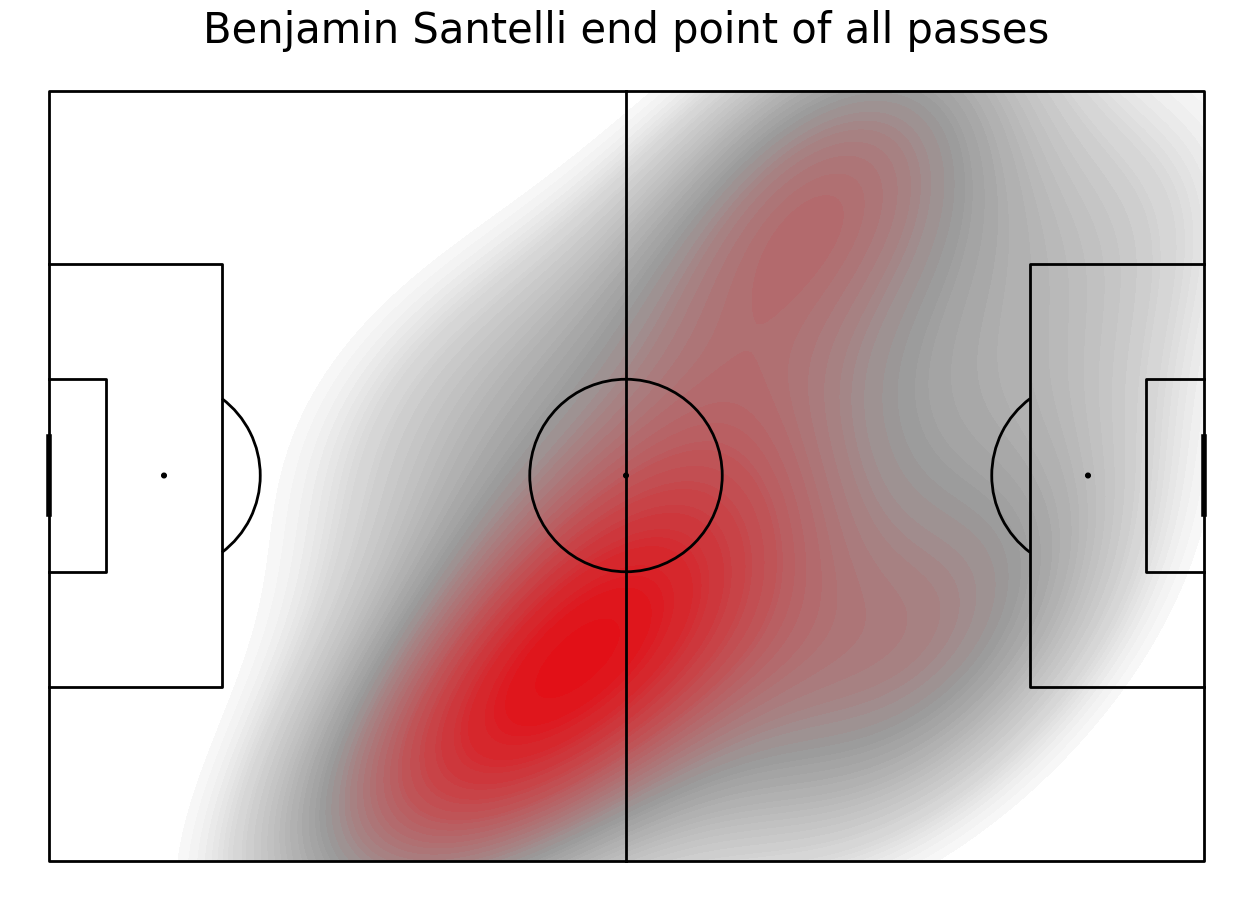

In [56]:
#set match id that you want to look at
match_id=3896595

#set name of team
team="Bastia"

#set name of player
player="Benjamin Santelli"

#create cmap and set colour variables
white="white"
sbred='#e21017'
lightgrey="#d9d9d9"
darkgrey='#9A9A9A'
statsbomb_cmap = LinearSegmentedColormap.from_list("StatsBomb - 50 colors",
['white',darkgrey, sbred] #note you can adjust these colours
, N=50)

#retrieve data from statsbombpy
df = sb.events(match_id = match_id ,creds=creds)

#parse start and end location of events
df[['x', 'y','z']] = df['location'].apply(pd.Series)
df[['pass_end_x', 'pass_end_y']] = df['pass_end_location'].apply(pd.Series)

#filter data to get events from selected team only
df=df[(df["team"]==team)]

#filter data to get events from selected player only
df=df[(df["player"]==player)]

#filter data to passes only
df=df[(df["type"]=="Pass")]

#separate complete and incomplete passes
df_complete=df[(df["pass_outcome"]!="Incomplete")&(df["pass_outcome"]!="Out")&
(df["pass_outcome"]!="Unknown")&(df["pass_outcome"]!="Pass Offside")&
(df["pass_outcome"]!="Injury Clearance")]

#set your pitch and figure details
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the heatmap for end point of passes
pitch.kdeplot(df_complete.pass_end_x, df_complete.pass_end_y, #note you can adjust this to show start point of passes, for example
shade=True, levels=100,
shade_lowest=False, ax=ax,
cmap=statsbomb_cmap)

#set title of viz
ax_title = ax.set_title(f'{player} end point of all passes', fontsize=30,color='black')

In [2]:
match = sb.matches(8, 281, creds = creds)

In [23]:
match

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,attendance,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3896699,2023-10-28,19:00:00.000,France - Ligue 2,2023/2024,Auxerre,Dunkerque,0,1,None,...,2024-06-12T13:50:38.469856,12,Regular Season,Stade de l''Abbé Deschamps,Ahmed Taleb,Christophe Pélissier,Luís Manuel Ferreira de Castro,1.1.0,2,2
1,3937511,2024-05-21,21:30:00.000,France - Ligue 2,2023/2024,Rodez,Paris FC,2,2,None,...,2024-06-05T00:28:15.615961,39,Promotion Play-offs - 1st Round,Stade Paul Lignon,Hakim Ben El Hadj Salem,Didier Santini,Stéphane Gilli,1.1.0,2,2
2,3937846,2024-05-24,21:30:00.000,France - Ligue 2,2023/2024,Saint-Étienne,Rodez,2,0,None,...,2024-06-12T13:06:36.315836,40,Promotion Play-offs - Final,Stade Geoffroy-Guichard,Thomas Léonard,Olivier Dall’Oglio,Didier Santini,1.1.0,2,2
3,3896948,2024-05-10,21:45:00.000,France - Ligue 2,2023/2024,Valenciennes,Quevilly Rouen,2,1,None,...,2024-06-26T08:21:56.086419,37,Regular Season,Stade du Hainaut,Benjamin Lepaysant,Ahmed Kantari,Jean Louis Garcia,1.1.0,2,2
4,3896742,2023-12-02,20:00:00.000,France - Ligue 2,2023/2024,Rodez,Concarneau,2,0,None,...,2024-05-21T08:52:29.131159,16,Regular Season,Stade Paul Lignon,Karim Abed,Didier Santini,Stéphane Le Mignan,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,3896600,2023-08-12,20:00:00.000,France - Ligue 2,2023/2024,Grenoble Foot,Paris FC,2,0,None,...,2023-10-16T11:20:34.162447,2,Regular Season,Stade des Alpes,Guillaume Paradis,Vincent Hognon,Stéphane Gilli,1.1.0,2,2
378,3896598,2023-08-12,20:00:00.000,France - Ligue 2,2023/2024,Guingamp,Dunkerque,0,1,None,...,2023-10-16T16:15:28.139925,2,Regular Season,Stade du Roudourou,Azzedine Souifi,Stéphane Dumont,Mathieu Chabert,1.1.0,2,2
379,3896597,2023-08-12,20:00:00.000,France - Ligue 2,2023/2024,Caen,Pau,2,0,None,...,2023-08-13T19:42:53.034724,2,Regular Season,Stade Michel d''Ornano,Ahmed Taleb,Jean-Marc Furlan,Nicolas Usaï,1.1.0,2,2
380,3896596,2023-08-12,20:00:00.000,France - Ligue 2,2023/2024,Auxerre,Amiens,0,1,None,...,2023-10-28T10:04:39.196529,2,Regular Season,Stade de l''Abbé Deschamps,Olivier Thual,Christophe Pélissier,Omar Daf,1.1.0,2,2


In [10]:
event = sb.events(3896595, creds = creds)

In [12]:
event[event.shot_outcome == "Goal"].possession

3047     78
3050    166
3056    200
Name: possession, dtype: int64

In [20]:
event[event.possession.isin(event[event.shot_outcome == "Goal"].possession)].groupby("possession").head(1).location

332    [14.5, 40.6]
714    [78.7, 80.0]
849    [38.9, 14.7]
Name: location, dtype: object

In [25]:
event[event.possession == 78].iloc[0].type

'Pass'

In [29]:
compet = sb.competitions(creds = creds)

In [31]:
compet[compet.competition_name == "Coupe de France"]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
14,86,281,France,Coupe de France,male,False,False,2023/2024,2024-07-02T13:13:14.063577,None,None,2024-07-02T13:13:14.063577
15,86,235,France,Coupe de France,male,False,False,2022/2023,2024-03-08T15:26:53.950408,None,None,2024-03-08T15:26:53.950408


In [33]:
match = sb.matches(86, 281, creds = creds)

In [35]:
event = sb.events(3924000, creds = creds)

In [43]:
event.groupby("possession").head(1).iloc[4]

50_50                                      NaN
ball_receipt_outcome                       NaN
ball_recovery_recovery_failure             NaN
block_deflection                           NaN
block_offensive                            NaN
                                      ...     
team                                  OGC Nice
team_id                                    136
timestamp                         00:02:32.317
type                                      Pass
under_pressure                             NaN
Name: 51, Length: 110, dtype: object